In [237]:
#Import library
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.mlab import PCA as mlabPCA


In [216]:
boston = datasets.load_boston()
data = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns=  boston['feature_names'].tolist() + ['target'])
print(data.head(2))
data.describe()
data_lean = np.array(data[['RM','AGE','DIS']]).reshape(3,data.shape[0])
print(data_lean)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  target  
0     15.3  396.9   4.98    24.0  
1     17.8  396.9   9.14    21.6  
[[ 6.575  65.2     4.09   ...  2.4259  6.319  96.1   ]
 [ 2.1     6.402  95.2    ... 46.3     5.2311  5.895 ]
 [59.6     5.615   6.059  ...  6.03   80.8     2.505 ]]


In [217]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [218]:
#Compute the d-dimensional mean vector 
mean_rm = np.mean(data_lean[0,:])
mean_age = np.mean(data_lean[1,:])
mean_dis = np.mean(data_lean[2,:])
mean_vector = np.array([[mean_rm],[mean_age],[mean_dis]])
print('Mean vector:\n', mean_vector)

Mean vector:
 [[26.95923439]
 [21.13422826]
 [30.56111561]]


In [219]:
#Computer the Scatter Matrix 
scatter_matrix = np.zeros((3,3))
for i in range(data_lean.shape[1]):
    scatter_matrix += (data_lean[:,i].reshape(3,1) - mean_vector).dot((data_lean[:,i].reshape(3,1)-mean_vector).T)
print('Scatter matrix:\n', scatter_matrix)

Scatter matrix:
 [[ 616992.87950072 -167515.23548827 -292751.40520601]
 [-167515.23548827  360931.36981725 -202846.76585365]
 [-292751.40520601 -202846.76585365  765088.26369361]]


In [220]:
#Compute the covariance matrix (alternative to the scatter matrix)
cov_mat = np.cov([data_lean[0,:], data_lean[1,:], data_lean[2,:]])
print('Covariance matrix:\n', cov_mat)

Covariance matrix:
 [[1221.76807822 -331.7133376  -579.70575288]
 [-331.7133376   714.7155838  -401.67676407]
 [-579.70575288 -401.67676407 1515.02626474]]


In [221]:
#Alternative ways of covariance matrix 
cov_mat =scatter_matrix/(data_lean.shape[1]-1)
print('Covariance matrix-new way:\n', cov_mat)

Covariance matrix-new way:
 [[1221.76807822 -331.7133376  -579.70575288]
 [-331.7133376   714.7155838  -401.67676407]
 [-579.70575288 -401.67676407 1515.02626474]]


In [222]:
#Eigenvectors and eigen values from the scatter matrix 
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)
#Eigenvectors and eigen values from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
#print('Eigen value and eigen vector of scatter matrix\n', eig_val_sc, eig_vec_sc)
#print('Eigen value and eigen vector of covariance matrix\n', eig_val_cov, eig_vec_cov)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov= eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1,eig_val_cov[i]))
    print('Scaling factor:', eig_val_sc[i]/eig_val_cov[i])
    print (40* '-')

Eigenvector 1: 
[[0.51065653]
 [0.72784983]
 [0.45767295]]
Eigenvalue 1 from scatter matrix: 115853.03362698387
Eigenvalue 1 from covariance matrix: 229.41194777620535
Scaling factor: 505.00000000000074
----------------------------------------
Eigenvector 2: 
[[ 0.63957634]
 [-0.6773267 ]
 [ 0.36355281]]
Eigenvalue 2 from scatter matrix: 627987.570118189
Eigenvalue 2 from covariance matrix: 1243.5397428082958
Scaling factor: 504.99999999999966
----------------------------------------
Eigenvector 3: 
[[-0.57460596]
 [-0.10706617]
 [ 0.81139684]]
Eigenvalue 3 from scatter matrix: 999171.9092664003
Eigenvalue 3 from covariance matrix: 1978.5582361710885
Scaling factor: 505.0000000000003
----------------------------------------


In [223]:
#Check the eigen vector -eigen value calculation
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv, decimal=6, err_msg='', verbose=True)

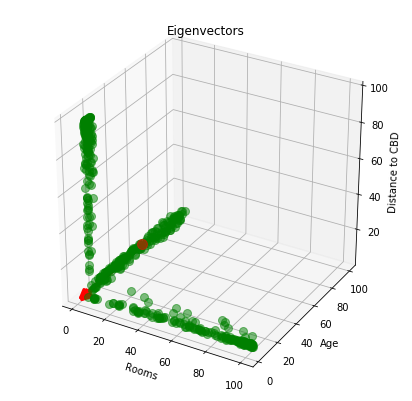

In [224]:
#Visualize eigen vectors 
class Arrow3D(FancyArrowPatch): 
    def __init__(self,xs,ys,zs,*args,**kwargs):
        FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
        self._verts3d = xs, ys, zs
    
    def draw(self,renderer):
        xs3d,ys3d,zs3d = self._verts3d
        xs,ys,zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self,renderer)

fig = plt.figure(figsize=(7,7))
ax =  fig.add_subplot(111,projection='3d')
ax.plot(data_lean[0,:], data_lean[1,:], data_lean[2,:],'o',markersize=8,color='green',alpha=0.5)
ax.plot([mean_rm],[mean_age],[mean_dis],'o',markersize=10,color='red',alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_rm,v[0]],[mean_age,v[1]],[mean_dis,v[2]],mutation_scale=20,lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('Rooms')
ax.set_ylabel('Age')
ax.set_zlabel('Distance to CBD')
plt.title('Eigenvectors')
plt.show()

In [230]:
#Sort eigen vectors by its associated eigen values
for ev in eig_vec_sc:
    np.testing.assert_array_almost_equal(1.0,np.linalg.norm(ev))
    
#Make a list of (eigen values, eigen vectors ) tples 
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

#Sort the (eigenvalue, eigen vectors) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
#Visiually confirm that it is true
for i in eig_pairs:
    print(i[0])

999171.9092664003
627987.570118189
115853.03362698387


In [231]:
#Choose the eigen vectors with the largeest values 
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.57460596  0.63957634]
 [-0.10706617 -0.6773267 ]
 [ 0.81139684  0.36355281]]


In [235]:
#Transform to new subspace
transformed = matrix_w.T.dot(data_lean)
assert transformed.shape == (2,506), "The matrix is not 2 * obs dimensional"

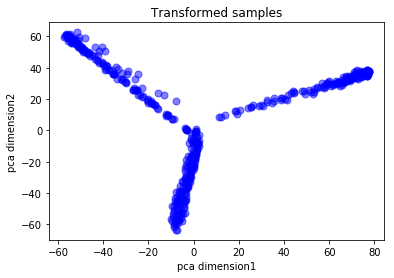

In [236]:
#Plot the trasnformed shape
plt.plot(transformed[0,:], transformed[1,:],'o',markersize=7,color='blue',alpha=0.5)
plt.xlabel('pca dimension1')
plt.ylabel('pca dimension2')
plt.title('Transformed samples')
plt.show()

C:\Users\nguqu781\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The PCA class was deprecated in version 2.2.
  


PC Axes in terms of the measurement axes scaled by the standard deviations:
 [[ 0.60447581  0.1943047  -0.77256371]
 [ 0.54675312 -0.80650926  0.22495296]
 [-0.57937037 -0.55838024 -0.59375203]]


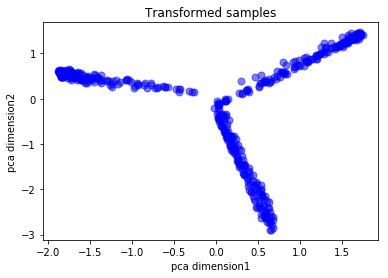

In [242]:
#Compare with existing all
mlab_pca = mlabPCA(data_lean.T)
print('PC Axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)
plt.plot(mlab_pca.Y[:,0], mlab_pca.Y[:,1], 'o',markersize=7,color='blue',alpha=0.5)
plt.xlabel('pca dimension1')
plt.ylabel('pca dimension2')
plt.title('Transformed samples')
plt.show()

In [241]:
print(mlab_pca.Y)

[[-1.06828725  0.42361171  0.2927503 ]
 [ 1.05042241  0.89932227  0.05444196]
 [ 0.62977057 -2.73643356 -0.79492276]
 ...
 [ 0.2457817  -1.28599501  0.25548562]
 [-1.47114059  0.44769589 -0.09217756]
 [ 1.64342328  1.38046202 -0.40015425]]


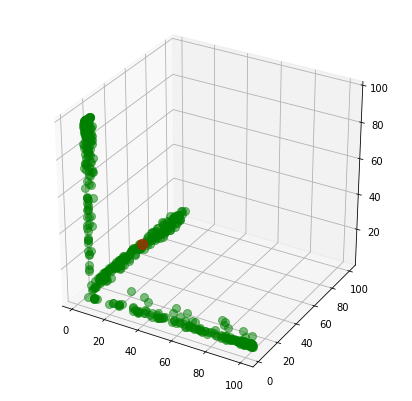

In [214]:
fig = plt.figure(figsize=(7,7))
ax =  fig.add_subplot(111,projection='3d')
ax.plot(data_lean[0,:], data_lean[1,:], data_lean[2,:],'o',markersize=8,color='green',alpha=0.5)
ax.plot([mean_rm],[mean_age],[mean_dis],'o',markersize=10,color='red',alpha=0.5)

In [243]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [247]:
print(pd.DataFrame(class1_sample).T.describe())

               0          1          2
count  20.000000  20.000000  20.000000
mean   -0.320108  -0.180381   0.110453
std     1.030882   1.053303   1.268253
min    -2.047569  -1.827662  -1.832516
25%    -1.339801  -1.155674  -0.861673
50%    -0.101686  -0.000375   0.089828
75%     0.516020   0.522720   0.637717
max     1.372486   1.346541   2.819196
